In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cynaptics-train/train.csv
/kaggle/input/cynaptics-test/test.csv
/kaggle/input/cynaptics-train-final/train - train.csv


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [3]:
data = pd.read_csv('../input/cynaptics-train-final/train - train.csv')


In [4]:
data

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,150728,2074419,37,1,0,1,0,Analyst,Kozhikode,Kerala,1,11,0
1,148628,3728026,48,17,0,1,1,Official,Nanded,Maharashtra,11,12,0
2,25237,7159687,38,5,0,1,0,Computer_operator,Jalgaon,Maharashtra,3,11,0
3,110209,277326,45,9,0,1,0,Eco0mist,Medininagar,Jharkhand,9,13,0
4,187462,8822191,26,13,0,1,0,Aviator,Gorakhpur,Uttar_Pradesh,3,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,124090,6097020,48,10,0,1,0,Physician,Gangtok,Sikkim,10,13,0
49996,129716,4759451,60,4,1,1,0,Official,Meerut,Uttar_Pradesh,4,13,0
49997,67903,378524,62,11,0,1,1,Firefighter,Deoghar,Jharkhand,4,14,0
49998,155258,1190125,33,12,0,1,0,Petroleum_Engineer,Bhopal,Madhya_Pradesh,8,10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   50000 non-null  int64 
 1   income               50000 non-null  int64 
 2   age                  50000 non-null  int64 
 3   experience           50000 non-null  int64 
 4   married              50000 non-null  int64 
 5   house_ownership      50000 non-null  int64 
 6   car_ownership        50000 non-null  int64 
 7   profession           50000 non-null  object
 8   city                 50000 non-null  object
 9   state                50000 non-null  object
 10  current_job_years    50000 non-null  int64 
 11  current_house_years  50000 non-null  int64 
 12  risk_flag            50000 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 5.0+ MB


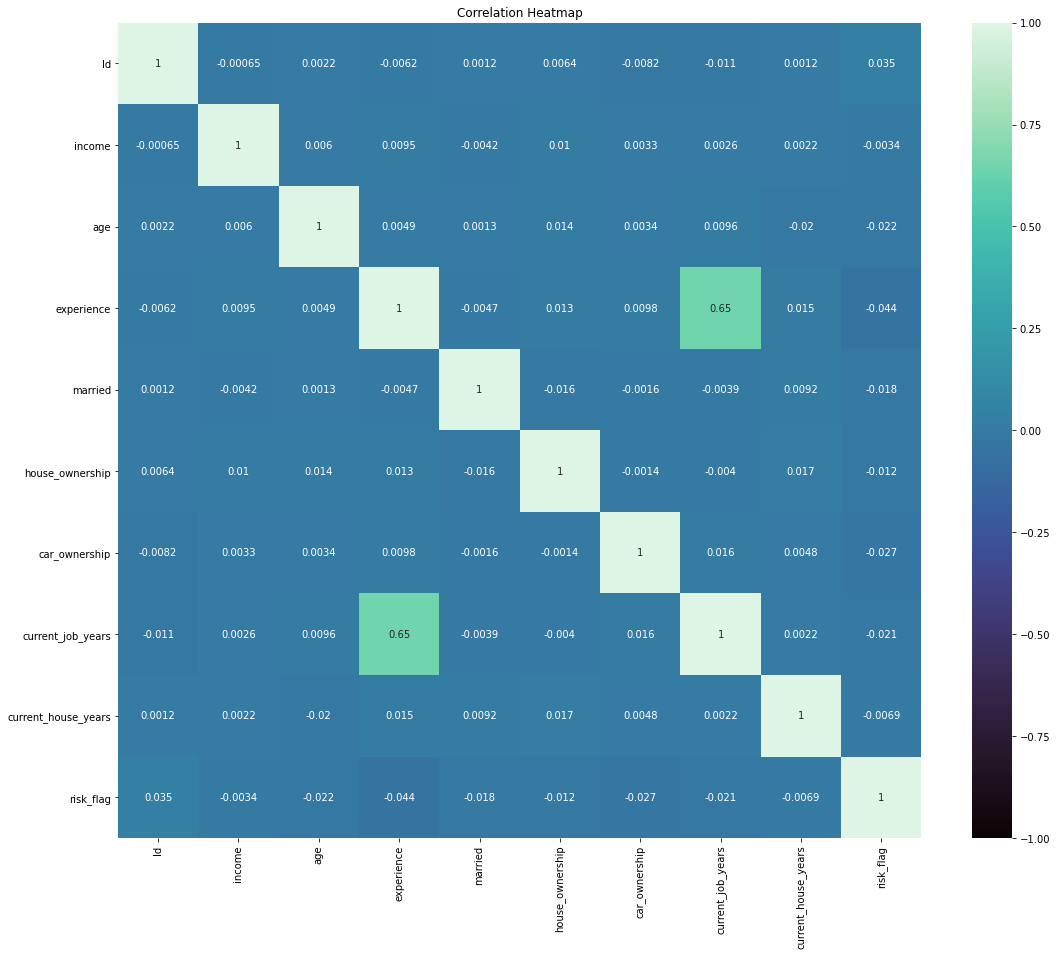

In [6]:
corr=data.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr,annot=True,vmin=-1.0,cmap='mako')
plt.title("Correlation Heatmap")
plt.show()

In [7]:
{'married':'MAR'}.items()
{'house_ownership':'HOS'}.items()
{'car_ownership':'CAR'}.items()

dict_items([('car_ownership', 'CAR')])

In [8]:
#pd.get_dummies(X['married'],prefix='MAR')
#pd.get_dummies(X['house_ownership'],prefix='HOS')
#pd.get_dummies(X['car_ownership'],prefix='CAR')

In [9]:
def onehot_encode(df, column_dict):
    df=df.copy()
    
    for column,prefix in column_dict.items():
        dummies = pd.get_dummies(df[column],prefix=prefix)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    
    return df

In [10]:
def preprocess_inputs(df):
    df= df.copy()
    
    df=df.drop('Id',axis=1)
    df=df.drop('profession',axis=1)
    df=df.drop('city',axis=1)
    df=df.drop('state',axis=1)
    
    df=onehot_encode(
        df,
        {
            'married':'MAR',
            'house_ownership':'HOS',
            'car_ownership':'CAR'
        }
    
    )
    
    y=df['risk_flag'].copy()
    X=df.drop('risk_flag',axis=1).copy()
    
    scaler=StandardScaler()
    X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
    
    return X,y

In [11]:
X,y=preprocess_inputs(data)

In [12]:
X

,income,age,experience,current_job_years,current_house_years,MAR_0,MAR_1,HOS_0,HOS_1,HOS_2,CAR_0,CAR_1
0,-1.012477,-0.760566,-1.507574,-1.455924,-0.715369,0.336878,-0.336878,-0.170906,0.295684,-0.234253,0.656618,-0.656618
1,-0.438594,-0.116027,1.160067,1.288327,-0.000729,0.336878,-0.336878,-0.170906,0.295684,-0.234253,-1.522955,1.522955
2,0.752362,-0.701972,-0.840664,-0.907074,-0.715369,0.336878,-0.336878,-0.170906,0.295684,-0.234253,0.656618,-0.656618
3,-1.636157,-0.291811,-0.173754,0.739477,0.713911,0.336878,-0.336878,-0.170906,0.295684,-0.234253,0.656618,-0.656618
4,1.329333,-1.405105,0.493157,-0.907074,-1.430008,0.336878,-0.336878,-0.170906,0.295684,-0.234253,0.656618,-0.656618
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.383564,-0.116027,-0.007026,1.013902,0.713911,0.336878,-0.336878,-0.170906,0.295684,-0.234253,0.656618,-0.656618
49996,-0.080639,0.587105,-1.007392,-0.632649,0.713911,-2.968437,2.968437,-0.170906,0.295684,-0.234253,0.656618,-0.656618
49997,-1.601037,0.704294,0.159702,-0.632649,1.428550,0.336878,-0.336878,-0.170906,0.295684,-0.234253,-1.522955,1.522955
49998,-1.319371,-0.994944,0.326429,0.465052,-1.430008,0.336878,-0.336878,-0.170906,0.295684,-0.234253,0.656618,-0.656618


In [13]:
y

0        0
1        0
2        0
3        0
4        1
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: risk_flag, Length: 50000, dtype: int64

In [14]:
{column: len(X[column].unique()) for column in X.columns}

{'income': 13162,
 'age': 59,
 'experience': 21,
 'current_job_years': 15,
 'current_house_years': 5,
 'MAR_0': 2,
 'MAR_1': 2,
 'HOS_0': 2,
 'HOS_1': 2,
 'HOS_2': 2,
 'CAR_0': 2,
 'CAR_1': 2}

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=123)

In [16]:
models = {
    LogisticRegression(): "   Logistic Regression",
    SVC():                "Support Vector Machine",
    MLPClassifier():      "        Neural Network"
}

for model in models.keys():
    model.fit(X_train, y_train)

In [19]:
for model, name in models.items():
    print(model.score(X_test, y_test)*100)

87.51333333333334
87.51333333333334
87.51333333333334
